# LABORATORIO 3, ANÁLISIS NÚMERICO II

Daniela Paz Díaz Mora 

201710003-6

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns
import scipy.stats as sp
import math
from scipy.misc import derivative
import scipy

 # 6. Programación

### a. Elabore un programa que interpole la función f(x)=cos(x) C[0,1] de tipo handle o domblica usando los polinomios de Bernstein de grado n. Compare sus resultados con al interpolación por polinomios de Bernstein mediante un grafico plot

Se tiene que como x se mueve entre 0 y 1 los polinomios de Bernstein P(x) de orden n, estaran dados por

P(x)=\sum_{i=1}^n c_i B_i^n(x)

donde C_i=f(i/n) y B_i^n(x)=(n i) x^i(1-x)^{n-i}

In [2]:
from scipy.interpolate import BPoly
#esta función es la unica en python que realiza la interpolación de bernstein,
#pero para el caso de un polinomio de grado mayor a dos no puedo construir
#el argumento c para que calce las dimensiones solicitadas, aun así realizare
#además este no construye el polinomio en si mismo, si no que una base de bernstein
# no encontre documentación mas alla de la original de spicy
# y la anterior solo contaba para n=2, tampoco encontre
#implementaciones analogas de esta función en foros ni en github...
#quizás usted podría saber como implementarla, ya que me quede en la duda de como
#hacerlo por python, como no es analoga a la función de matlab no se realizara 
# ni su implementación ni grafica, no habiendo otra función otorgada por pyhton
#para poder remplazarla, sin embargo se graficara cos(x) para ver como se comporta
# la aproximación

In [3]:
def comb(n, r):
    a = np.math.factorial(n)
    b = np.math.factorial(r)*np.math.factorial(n-r)
    return a/b


def bernstein(f, n):
    matrix_aux=np.zeros((n+1, n+1))
    for i in range(0,n+1):
        for j in range(0,n+1-i):
            matrix_aux[i][n-j]=comb(n, i)*comb(n-i, j)*f(float(i)/n)*(-1)**(n-i-j)
    coef_pol=matrix_aux.sum(axis=0)
    return coef_pol

In [4]:
n=10
polbernstein=np.poly1d(bernstein(np.cos,n).tolist()[::-1])

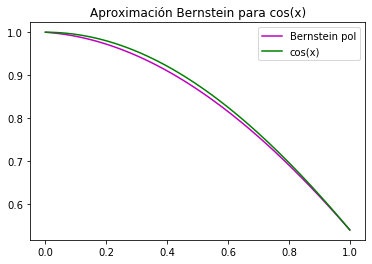

In [5]:
n=10
x=np.arange(0,101)/100
plt.plot(x,polbernstein(x),c='m',label='Bernstein pol')
plt.plot(x,np.cos(x),c='g',label='cos(x)')
plt.legend()
plt.title('Aproximación Bernstein para cos(x)')
plt.show()

### b. Adaptar la regla de simpson compuesta para aproximar la integral de una función en un intervalo [a,b] que pase a través de M nodos, no necesariamente quiespaciados.

In [6]:
xk=[]
fxk=[]
for i in range(0,13):
    xk.append(np.sqrt(i*i+1))
    fxk.append(i**(1/3))

n=len(xk)-1
b=xk[n]
a=xk[0]
h=(b-a)/n

sum1=0
sum2=0
integral=0
for i in range(1,7):
    if n%2 != 0:
        print('no puede ocupar la regla 1/3 de simpson compuesta')
        if n%3 ==0:
            print('ocupe la regla se 3/8 simpson compuesta ')
        else:
            print('ocupe la regla del trapezoide')
    else:
        sum1+=fxk[2*i-1]
        if i<7:
            sum2+=fxk[2*i]
if n%2 ==0:    
    integral=h*(fxk[0]+2*sum1+4*sum2+fxk[n-1])/3

In [7]:
integral

20.670982950583607

Notemos que el ejercicio toma 14 puntos, es decir 13 intervalos lo cual implica que n=13 y no podemos ocupar la regla de simpson 1/3 compuesta ya que esta es para n es par, tampoco cumple el requisito para simson 3/8 ya que esta debe ser impar multiplo de 3, siendo la unica opción ocupar la regla del trapezoide, para no perder la idea del ejercicio modifique los puntos tomandose i=0,1,...,13 cumpliendo así el requisito para simpson compuesta